In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
df = pd.read_csv("/Users/vm/Ironhack/labs/amz_uk_price_prediction_dataset.csv")

In [3]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [5]:
df['category'].value_counts()

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [6]:
df['isBestSeller'].value_counts()

isBestSeller
False    2435671
True        7980
Name: count, dtype: int64

In [ ]:
# Crosstab
crosstab = pd.crosstab(df['category'], df['isBestSeller'])
print(crosstab)

isBestSeller                    False  True 
category                                    
3D Printers                       247      1
3D Printing & Scanning           4065      2
Abrasive & Finishing Products     245      5
Action Cameras                   1696      1
Adapters                          251      3
...                               ...    ...
Wind Instruments                  243      7
Window Treatments                 234      5
Women                           17559    213
Women's Sports & Outdoor Shoes   1939     20
eBook Readers & Accessories       246      0

[296 rows x 2 columns]


In [10]:
# Calculate proportion of best-sellers per category
df_prop = (
    pd.crosstab(df['category'], df['isBestSeller'], normalize='index')  # normalize by row
    .sort_values(by=True, ascending=False)  # sort by proportion of True
)

df_prop = df_prop.rename(columns={False: 'NotBest-Seller', True: 'Best-Seller'})
print(df_prop.head(10))

isBestSeller                    NotBest-Seller  Best-Seller
category                                                   
Grocery                               0.941865     0.058135
Smart Home Security & Lighting        0.942308     0.057692
Health & Personal Care                0.942314     0.057686
Mobile Phone Accessories              0.957529     0.042471
Power & Hand Tools                    0.964661     0.035339
Billiard, Snooker & Pool              0.967871     0.032129
Pet Supplies                          0.969800     0.030200
Home Brewing & Wine Making            0.971545     0.028455
Wind Instruments                      0.972000     0.028000
Mirrors                               0.972000     0.028000


In [ ]:
from scipy.stats import chi2_contingency

# Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab)

chi2_statistic, chi2_p_value

(np.float64(36540.20270061387), np.float64(0.0))

In [ ]:
from scipy.stats.contingency import association

# Compute Cramér's V to understand the strength of association between best-seller status and category.
association(crosstab, method="cramer")

<Axes: xlabel='category'>

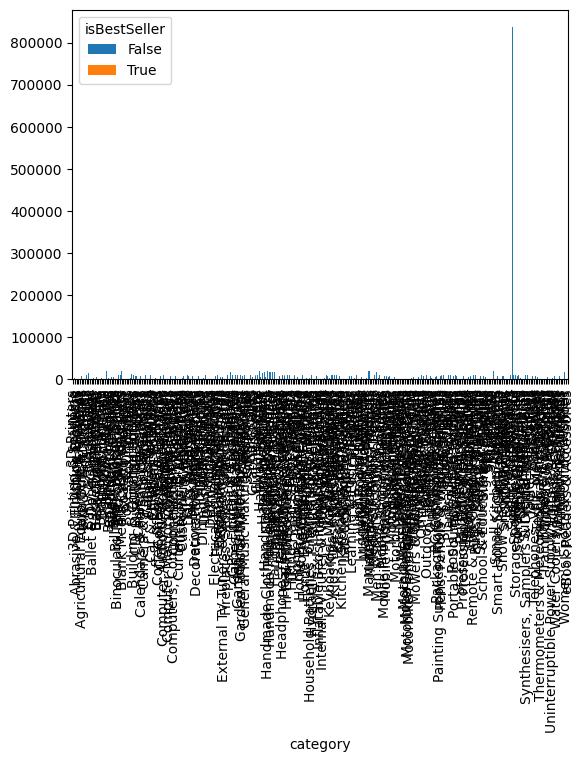

In [12]:
# Visualize the relationship between product categories and the best-seller status using a stacked bar chart.
crosstab.plot(kind="bar", stacked=True)

In [13]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

In [14]:
# Get outliers in price column
outliers = tukeys_test_outliers(df['price'])

print(f"Number of price outliers: {len(outliers)}")
print(outliers.sort_values().head(10))  # Show first 10 outliers

Number of price outliers: 327688
1743190    100.0
1052122    100.0
1831498    100.0
1691277    100.0
367376     100.0
1009217    100.0
1009214    100.0
1008532    100.0
1394486    100.0
1641799    100.0
Name: price, dtype: float64


In [15]:
# Keep only rows where price is NOT an outlier
df_no_outliers = df.drop(outliers.index)

print(f"Original dataset size: {df.shape[0]}")
print(f"Dataset size after removing outliers: {df_no_outliers.shape[0]}")

Original dataset size: 2443651
Dataset size after removing outliers: 2115963


In [16]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


/var/folders/zc/ljl3_lqn79125zg278rlpwtr0000gn/T/ipykernel_23614/322495062.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/var/folders/zc/ljl3_lqn79125zg278rlpwtr0000gn/T/ipykernel_23614/322495062.py:9: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


<Axes: xlabel='price', ylabel='category'>

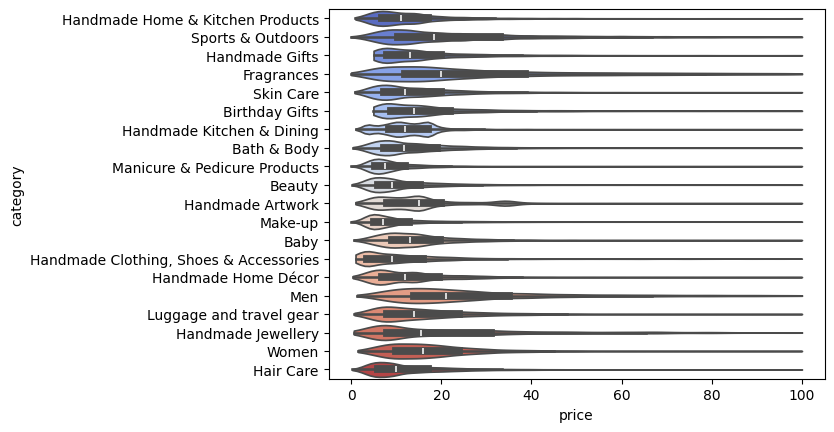

In [21]:
top_20_categories = (
    df['category']
    .value_counts()
    .head(20)
    .index
)
df_top_20_no_outliers = df_no_outliers[df_no_outliers['category'].isin(top_20_categories)]

sns.violinplot(
    data=df_top_20_no_outliers,
    x='price',
    y='category',
    palette="coolwarm",
    scale="width",
    cut=0
)

In [23]:
# Calculate median price per category
median_prices = df_no_outliers.groupby("category")["price"].median()

# Sort descending to find highest median price
highest_median_category = median_prices.sort_values(ascending=False).head(1)

print(highest_median_category)

category
Desktop PCs    74.0
Name: price, dtype: float64


/var/folders/zc/ljl3_lqn79125zg278rlpwtr0000gn/T/ipykernel_23614/4230578373.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_per_category.index, y=avg_price_per_category.values, palette='viridis')


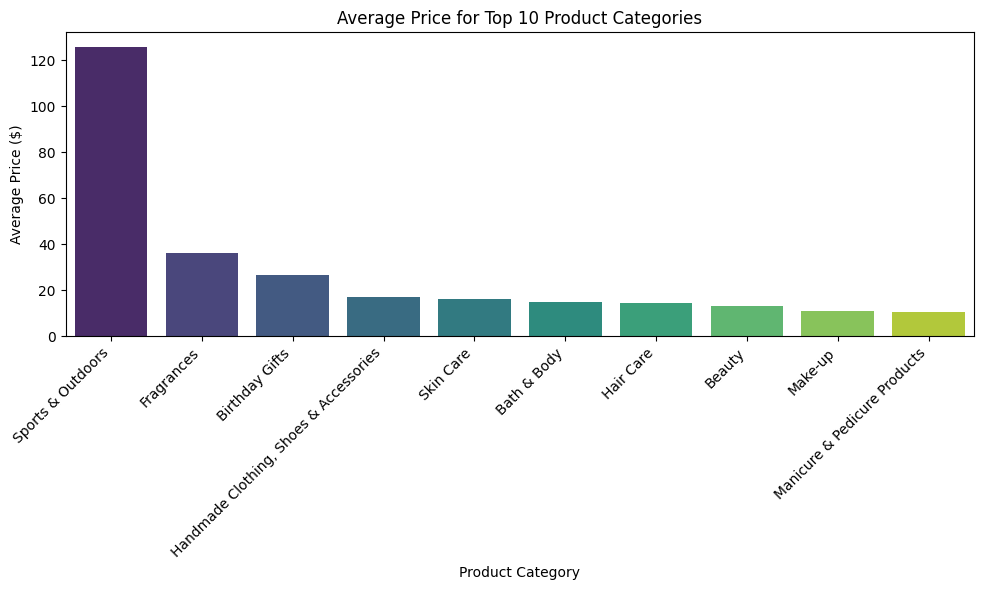

In [28]:

# Filter the dataframe for top 10 categories
top_10_df = df[df['category'].isin(top_10_categories)]

# Calculate average price per category
avg_price_per_category = top_10_df.groupby('category')['price'].mean().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=avg_price_per_category.index, y=avg_price_per_category.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Price ($)')
plt.xlabel('Product Category')
plt.title('Average Price for Top 10 Product Categories')
plt.tight_layout()
plt.show()

In [29]:
# Calculate average price per category (all categories)
avg_price_all_categories = df.groupby('category')['price'].mean()

# Find the category with the highest average price
highest_avg_category = avg_price_all_categories.idxmax()
highest_avg_price = avg_price_all_categories.max()

print(f"The category with the highest average price is '{highest_avg_category}' with an average price of ${highest_avg_price:.2f}")

The category with the highest average price is 'Laptops' with an average price of $1087.99


/var/folders/zc/ljl3_lqn79125zg278rlpwtr0000gn/T/ipykernel_23614/1890692655.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y='stars', data=top_10_df, palette='coolwarm')


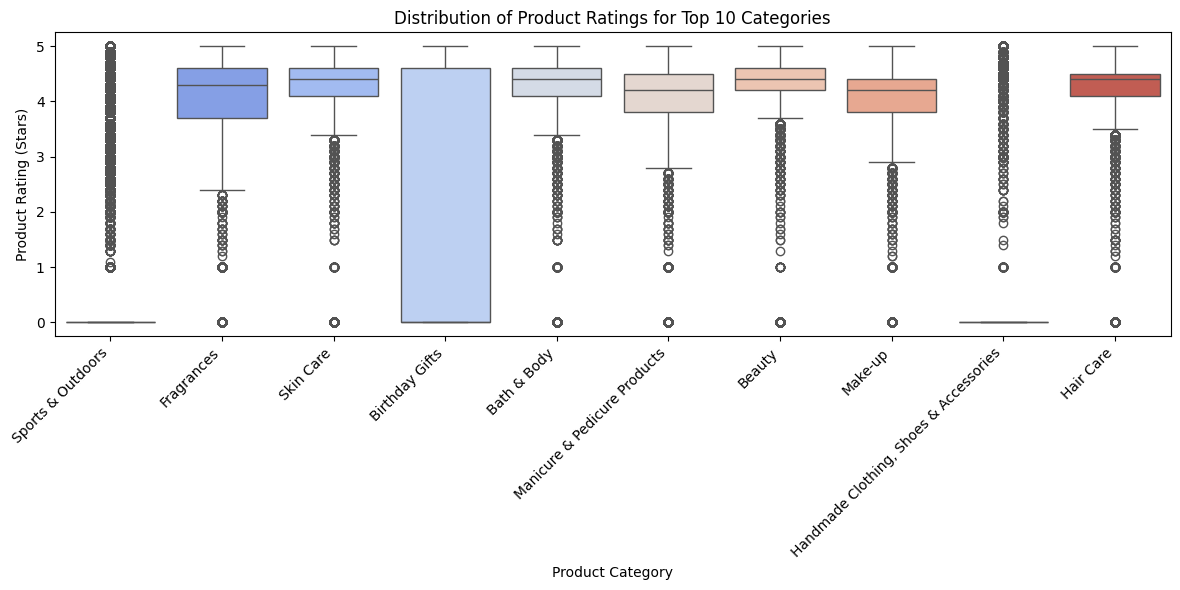

In [30]:
# Get top 10 categories by count
top_10_categories = df['category'].value_counts().head(10).index

# Filter for top 10 categories
top_10_df = df[df['category'].isin(top_10_categories)]

# Plot side-by-side box plots of ratings
plt.figure(figsize=(12,6))
sns.boxplot(x='category', y='stars', data=top_10_df, palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Product Rating (Stars)')
plt.xlabel('Product Category')
plt.title('Distribution of Product Ratings for Top 10 Categories')
plt.tight_layout()
plt.show()

In [31]:
# Calculate median rating per category for all categories
median_rating_per_category = df.groupby('category')['stars'].median()

# Identify the category with the highest median rating
highest_median_category = median_rating_per_category.idxmax()
highest_median_rating = median_rating_per_category.max()

print(f"The category with the highest median rating is '{highest_median_category}' with a median rating of {highest_median_rating} stars.")

The category with the highest median rating is 'Computer Memory' with a median rating of 4.7 stars.


In [32]:
# Calculate the correlation coefficient between price and stars.
correlation = df['price'].corr(df['stars'])
correlation

np.float64(-0.12490673262149324)

In [ ]:
#The correlation is slightly negative, meaning that as price increases, ratings tend to slightly decrease, but the effect is very weak.

<Axes: xlabel='stars', ylabel='price'>

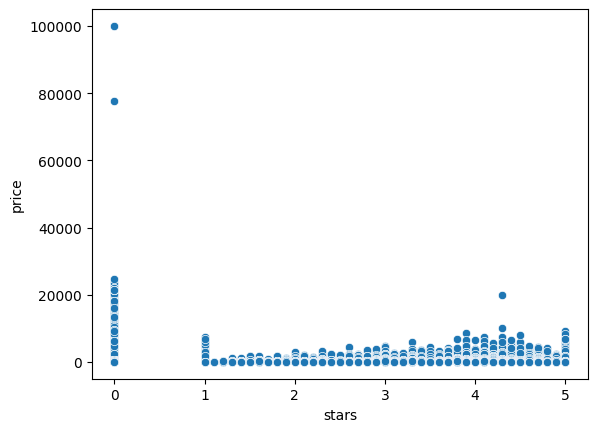

In [34]:
# Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
sns.scatterplot(data=df, x='stars', y='price')

In [35]:
# Separating between discrete and continuous variables, as discrete ones could potentially be treated as categorical.
# Remember to adjust the threshold (in this case, < 20) based on your dataset's specific characteristics and domain knowledge.
potential_categorical_from_numerical = df.select_dtypes("number").loc[:, df.select_dtypes("number").nunique() < 20]
potential_categorical_from_numerical

""
0
1
2
3
4
...
2443646
2443647
2443648
2443649


In [37]:
# Extracting columns with object (typically string) data types to create a categorical dataframe
# For demonstration purposes, let's consider the columns in potential_categorical_from_numerical as categorical variables.
df_categorical = pd.concat([df.select_dtypes("object"), potential_categorical_from_numerical], axis=1)

# Adjusting the numerical dataframe by removing the moved columns
df_numerical = df.select_dtypes("number").drop(columns=potential_categorical_from_numerical.columns)

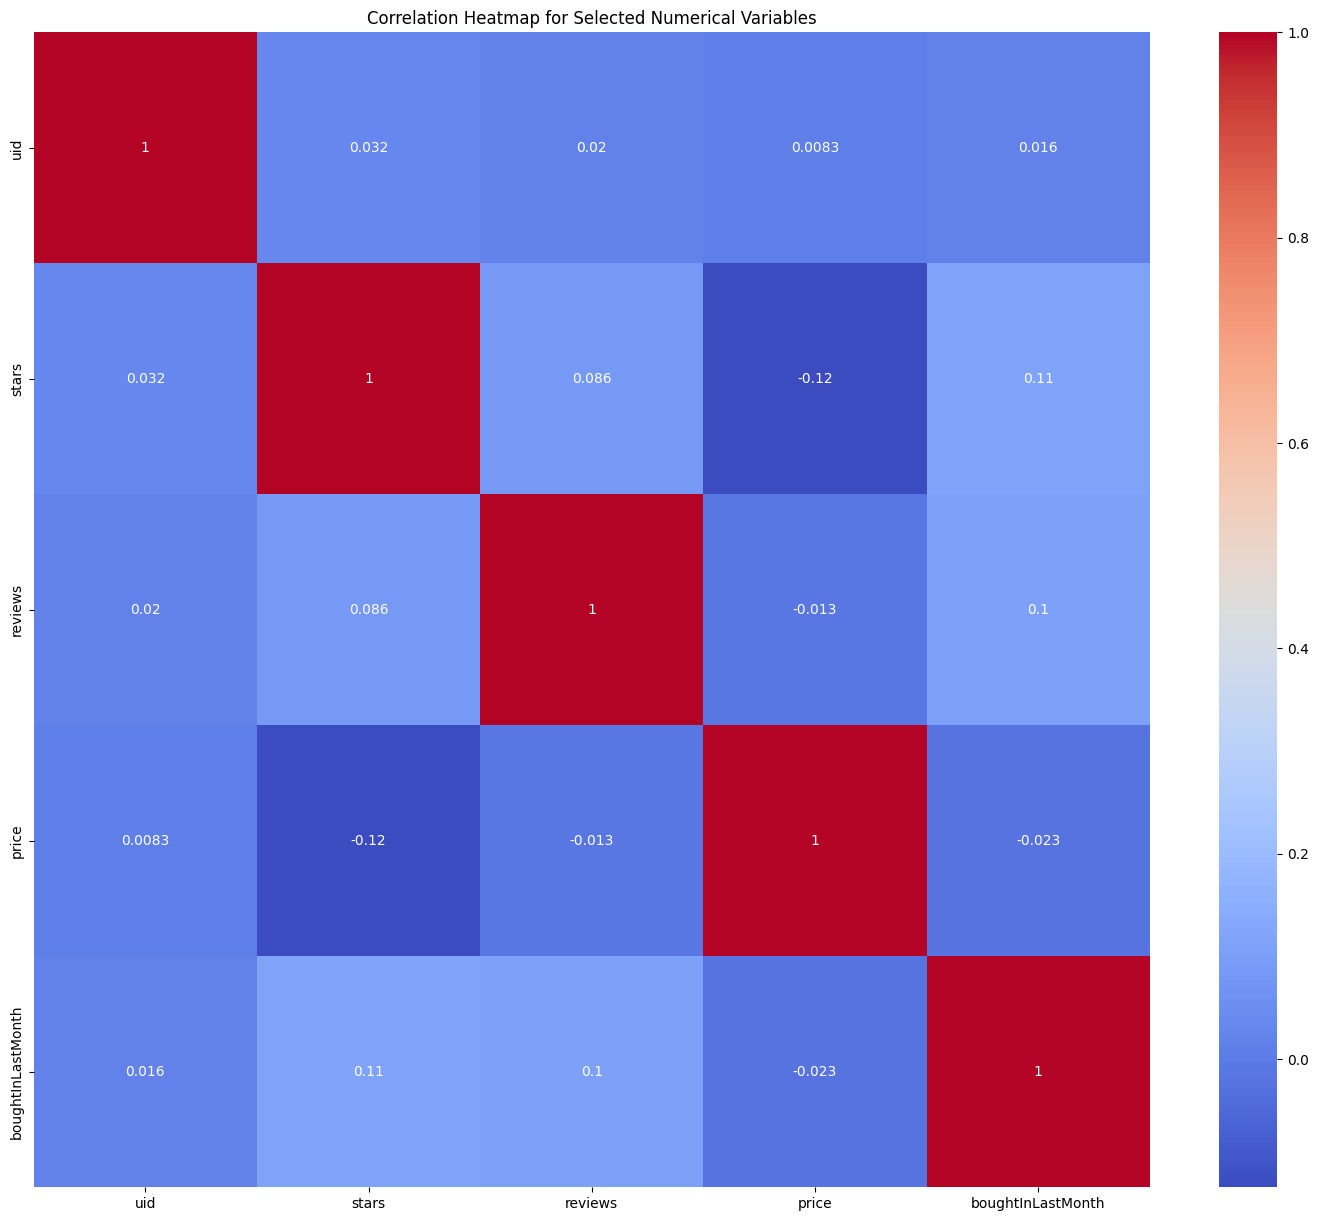

In [38]:
correlation_matrix = df_numerical.corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

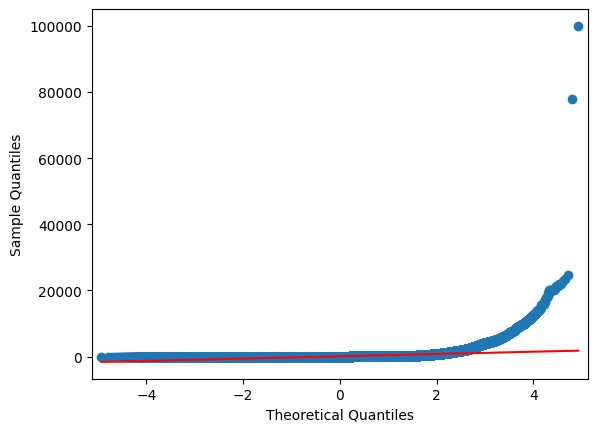

In [39]:
import statsmodels.api as sm

# Examine if product prices typically follow a normal distribution using a QQ plot.
sm.qqplot(df['price'], line='s');